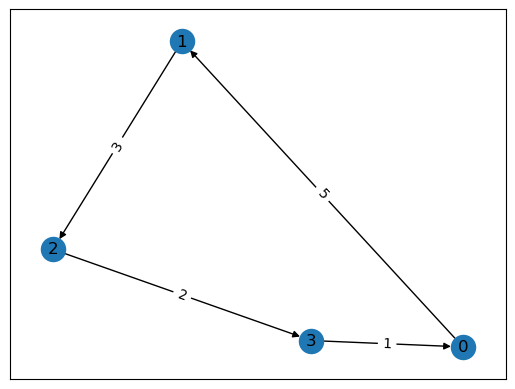

                  0       1       2       3       4 
            ------- ------- ------- ------- ------- ----
Node   0: |   0.000    5.000   0.000    0.000    0.000     |
Node   1: |   0.000    0.000    3.000   0.000    0.000     |
Node   2: |   0.000    0.000    0.000    2.000   0.000     |
Node   3: |   1.000   0.000    0.000    0.000    0.000     |
Node   4: |   0.000    0.000    0.000    0.000    0.000     |


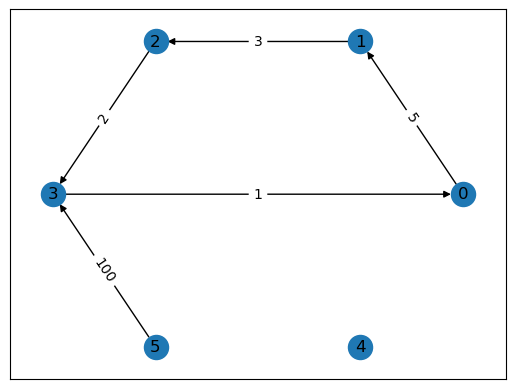

                  0       1       2       3       4       5 
            ------- ------- ------- ------- ------- ------- ----
Node   0: |   0.000    5.000   0.000    0.000    0.000    0.000    |
Node   1: |   0.000    0.000    3.000   0.000    0.000    0.000    |
Node   2: |   0.000    0.000    0.000    2.000   0.000    0.000    |
Node   3: |   1.000   0.000    0.000    0.000    0.000    0.000    |
Node   4: |   0.000    0.000    0.000    0.000    0.000    0.000    |
Node   5: |   0.000   0.000   0.000 100.000   0.000   0.000    |


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class AdjMatrix:
    def __init__(self, V):
        self.V = V
        self.graph = nx.DiGraph()  # Używamy DiGraph dla krawędzi skierowanych
        
        # Etykieta
        self.label = None
        
        #Metrics
        self.density = None
        self.averageClustering = None

    def addEdge(self, beg, end, weight):
        if (beg >= self.V) or (beg < 0) or (end >= self.V) or (end < 0) or (weight < 0):
            return False
        else:
            self.graph.add_edge(beg, end, weight=weight)
            self.graph.add_edge(end, beg, weight=weight)
        return True

    def addDirectedEdge(self, beg, end, weight):
        if (beg >= self.V) or (beg < 0) or (end >= self.V) or (end < 0) or (weight < 0):
            return False
        else:
            self.graph.add_edge(beg, end, weight=weight)
        return True
    
    def calculateMetrics(self):
        self.density = nx.density(self.graph)
        self.averageClustering = nx.average_clustering(self.graph)

    def distance(self, beg, end):
        return self.graph[beg][end]["weight"]

    def showGraph(self):
        print("           ", end=" ")
        for i in range(self.V):
            print(f"{i:7d}", end=" ")
        print()
        print("           ", end=" ")
        for i in range(self.V):
            print("-------", end=" ")
        print("----")
        for i in range(self.V):
            print(f"Node {i:3d}: |", end=" ")
            for j in range(self.V):
                if self.graph.has_edge(i, j):
                    weight = self.graph[i][j].get("weight", 0)
                    if weight < 0:
                        print(f"{weight:+7.3f}", end=" ")
                    else:
                        print(f"{weight:7.3f}", end=" ")
                else:
                    print("  0.000 ", end=" ")
            print("   |")

    def getV(self):
        return self.V

    def getMatrix(self):
        return self.graph

    def add_to_edge(self, source, target, weight):
        if source < 0 or source >= self.V or target < 0 or target >= self.V:
            print("Error: Source and target nodes must be within the range [0, num_nodes-1]")
            return

        if self.graph.has_edge(source, target):
            self.graph[source][target]['weight'] += weight
        else:
            self.graph.add_edge(source, target, weight=weight)

        
        
    def addVertex(self):
        new_vertex = self.V
        self.V += 1
        self.graph.add_node(new_vertex)  # Dodawanie nowego wierzchołka
        for i in range(self.V):
            self.graph.add_edge(i, new_vertex, weight=0)
            self.graph.add_edge(new_vertex, i, weight=0)

        
    def display(self):
        pos = nx.kamada_kawai_layout(self.graph)  # użyj kamada_kawai_layout do bardziej sensownego układu wierzchołków

        # Nodes with labels
        nx.draw_networkx_nodes(self.graph, pos, node_size=300)
        node_labels = {node: str(node) for node in self.graph.nodes()}
        nx.draw_networkx_labels(self.graph, pos, labels=node_labels)

        # Edges with weight > 0
        edge_labels = {(u, v): d["weight"] for u, v, d in self.graph.edges(data=True) if d.get("weight", 0) > 0}
        nx.draw_networkx_edges(self.graph, pos, width=1.0, style="solid", edgelist=edge_labels.keys())

        # Edge weight labels
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)

        plt.show()


# Example usage:
V = 5  # Number of vertices
my_graph = AdjMatrix(V)
# Dodawanie krawędzi z wagami
my_graph.addDirectedEdge(0, 1, 5)
my_graph.addDirectedEdge(1, 2, 3)
my_graph.addDirectedEdge(2, 3, 2)
my_graph.addDirectedEdge(3, 0, 1)
my_graph.display()
my_graph.showGraph()
my_graph.calculateMetrics()

my_graph.addVertex()  # Dodawanie nowego wierzchołka
my_graph.add_to_edge(5,3,100)
my_graph.display()
my_graph.showGraph()


# Wczytywanie danych do pamięci
Skoro już mamy potrzebne struktury danych, trzeba by jakoś wczytać zbiory danych uczących, które otrzymaliśmy od prowadzącej

In [4]:
import os

folder_path = "euro28"
V = 28

def is_dict(param):
    return isinstance(param, dict)

def readResultsContent(content):
    data_dict = {} # Słownik
    lines = content[1:]
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 2:
            key, value = parts
            data_dict[int(key)] = float(value)
    return data_dict
    

def countAverage(lines):
    suma = 0.0
    count = len(lines)
    for line in lines:
        value = float(line)
        suma += value
    if count > 0: 
        average = suma/count
        return average
    else:
        return 0.0
    
    
def createGraph(files, label):
    graph = AdjMatrix(V)
    
    # Dodawanie krawędzi:
    for file in files:
        source = int(file[1])
        destination = int(file[2])
        average = countAverage(file[4:])
        graph.add_to_edge(source, destination, average)
    
    graph.label = label
    return graph
    
def prepareGraphs(simulations, demands_path):
    graphs = []
    
    if is_dict(simulations):
        # Na każdą symulację
        graph_files = []
        prevSim = 0
        for simulation, simulation_value in simulations.items():
            # Ładowanie simulation grafów
            for i in range(0, simulation):
                file_name = f"{i}.txt"
                file_path = os.path.join(demands_path, file_name)
                
                if (i >= prevSim and simulation != list(simulations.keys())[0]) or (simulation == list(simulations.keys())[0]):
                    if os.path.exists(file_path) and os.path.isfile(file_path):
                        with open(file_path, 'r') as requests:
                            lines = requests.readlines()
                            graph_files.append(lines)
                    else:
                        print(f"Nie znaleziono pliku {file_name} w lokalizacji {demands_path}")
                
            ## Tutaj obsługa robienia grafów żeby móc tylko doładowywać w następnych symulacjach
            graph = createGraph(graph_files, simulation_value)
            graphs.append(graph)
            
            
            prevSim = simulation
        
    else:
        print("Nie podano słownika!")
    
    return graphs
        
                    
def processFiles(folder_path):
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        request_sets = os.listdir(folder_path)
        for request_set in request_sets:
            print(request_set)
            request_set_path = os.path.join(folder_path, request_set)
            files = os.listdir(request_set_path)
            demands = None
            for file in files:
                if file.startswith("demand"):
                    demands = os.path.join(request_set_path, file)
            
            for file in files:
                file = os.path.join(request_set_path, file)
                if file.endswith("active_transceivers.txt"):
                    with open(file, 'r') as active_transceivers_file:
                        content = active_transceivers_file.readlines()
                        simulations = readResultsContent(content)
                    
                        ## TUTAJ JEST SŁOWNIK Z ACTIVE_TRANSCEIVERS LICZBA:WYNIK
                        ## Wszystko zgodnie z kolumnami
                        graphs = prepareGraphs(simulations, demands)
                        GRAPHS.extend(graphs)
    else:
        print("Niepoprawna ścieżka!")
    
    print(f"Liczba grafów w pamięci: {len(GRAPHS)}")

GRAPHS = []
processFiles(folder_path)


request-set-0
request-set-1
request-set-2
requests-set-3
requests-set-4
requests-set-5
requests-set-6
requests-set-7
requests-set-8
requests-set-9
Liczba grafów w pamięci: 230


# Obliczanie metryk 
Wywołana metoda na wszystkich grafach oblicza ich metryki na podstawie reprezentacji grafów powstałych z przesłanych danych.

In [8]:
for graph in GRAPHS:
    graph.calculateMetrics()

# Przygotowanie zbioru danych
Obiekt "data" zawiera w tym kodzie jedynie:
* krawędzie, 
* wagi krawędzi, 
* globalną etykietę, 
* globalne cechy.

In [33]:
import torch
from torch_geometric.data import Data

def prepare_dataset():
    graph_list = []
    
    for graph in GRAPHS:
        # Dodanie globalnej etykiety (liczba typu float)
        label = graph.label
        # Dodanie globalnych cech dla grafu
        global_feature = []
        global_feature.append(graph.density)
        global_feature.append(graph.averageClustering)
        # Konwersja do PyTorch Geometric Data
        edge_index = torch.tensor(list(graph.graph.edges)).t().contiguous()
        edge_attr = torch.tensor([graph.graph[i][j]['weight'] for i, j in graph.graph.edges], dtype=torch.float).view(-1, 1)
        y = torch.tensor([label], dtype=torch.float).view(1, -1)
        global_feature = torch.tensor(global_feature, dtype=torch.float).view(1, -1)
        
        data = Data(edge_index=edge_index, edge_attr=edge_attr, y=y, global_feature=global_feature)
        graph_list.append(data)
        
    return graph_list

dataset = prepare_dataset()
print("OK")

OK


# PODZIAŁ ZBIORU DANYCH NA UCZĄCE I TESTOWE ORAZ ZAPIS DO PLIKÓW

In [35]:
import torch
from torch.utils.data import random_split

# Ustaw seed, aby uzyskać powtarzalne wyniki
torch.manual_seed(42)

train_ratio = 0.8
num_train = int(train_ratio * len(dataset))
num_test = len(dataset) - num_train

# Podział danych na zbiór uczący i testowy
train_dataset, test_dataset = random_split(dataset, [num_train, num_test])

# Zapisz zbiory do plików
torch.save(train_dataset, 'train_dataset.pt')
torch.save(test_dataset, 'test_dataset.pt')

print("Zbiory uczący i testowy zostały utworzone i zapisane.")

Zbiory uczący i testowy zostały utworzone i zapisane.


In [36]:
# Wczytaj zbiory uczący i testowy
train_dataset = torch.load('train_dataset.pt')

print(len(train_dataset))

184


# Próba wykorzystania istniejącego modelu RegGNN
https://github.com/basiralab/RegGNN/blob/main/proposed_method/RegGNN.py

Nasze zadanie opiera się na przygotowaniu modelu rozwiązującego zadanie regresji grafowej, czyli na podstawie grafów, ich cech globalnych i etykiet chcemy prognozować wartość metryki średniej ilości wykorzystanych transceiverów podczas symulacji.

In [37]:
'''RegGNN regression model architecture.

torch_geometric needs to be installed.
'''

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn.dense import DenseGCNConv


class RegGNN(nn.Module):
    '''Regression using a DenseGCNConv layer from pytorch geometric.

       Layers in this model are identical to GCNConv.
    '''

    def __init__(self, nfeat, nhid, nclass, dropout):
        super(RegGNN, self).__init__()

        self.gc1 = DenseGCNConv(nfeat, nhid)
        self.gc2 = DenseGCNConv(nhid, nclass)
        self.dropout = dropout
        self.LinearLayer = nn.Linear(nfeat, 1)

    def forward(self, x, edge_index):
        x = F.relu(self.gc1(x, edge_index))

        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, edge_index)
        x = self.LinearLayer(torch.transpose(x, 2, 1))

        return torch.transpose(x, 2, 1)

    def loss(self, pred, score):
        return F.mse_loss(pred, score)